In [1]:
%load_ext autoreload
%autoreload 2
sys.path.append('../../src')

import os
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

from utils.formatter import get_energy, get_usetime
from utils.functions import load_datasets_from_csv, lists_to_dict
from plot_bars import plot_horizontal_bars

from paths import ROOT_DIR, FLLD_DB_DIR
IMG_PATH = ROOT_DIR+'/img/bar'


if not os.path.exists(IMG_PATH):
    os.mkdir(IMG_PATH)

In [2]:
dts = load_datasets_from_csv(FLLD_DB_DIR).copy()

In [3]:
sns.set_style({'font.family':'sans', 'font.serif':'Helvetica'})
sns.set_context(rc={"font.size":13,"axes.titlesize":13,"axes.labelsize":13}) 

In [4]:
energy_d = {}
for key in dts:
    try:
        energy_d[key] = get_energy(dts[key])
    except Exception as e:
        print(e)
energy_d['others'] = energy_d['house'] - (energy_d['air'] + energy_d['computer'] + energy_d['fan'] + energy_d['fridge'] + energy_d['pump'])

'Pwr'


In [5]:
load_energy = [energy_d['air'], energy_d['pump'], energy_d['computer'], energy_d['fridge'], energy_d['fan'], energy_d['others']]
load_names = ['Ar-Condicionado', 'Bomba','Computador','Geladeira','Ventilador','Outras cargas']
energy = lists_to_dict(load_names, load_energy, True)

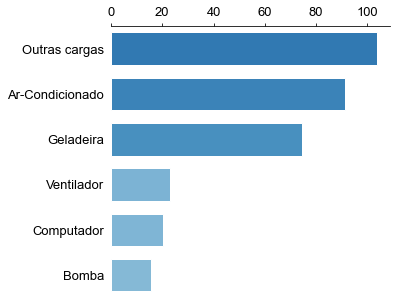

In [6]:
plot_horizontal_bars(energy, 5, 5, 'Energia em quilowatts (kWh)', 0.001, 0.72)
path = IMG_PATH+"/energy_consumption.svg"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
path = IMG_PATH+"/energy_consumption.png"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')

In [7]:
usetime_d = {}
for key in dts:
    try:
        usetime_d[key] = get_usetime(dts[key])
    except Exception as e:
        print(e)

'Pwr'


In [8]:
load_usetime = [usetime_d['air'], usetime_d['fridge'], usetime_d['fan'], usetime_d['computer'], usetime_d['pump']]
load_names = ['Ar-Condicionado','Geladeira','Ventilador','Computador','Bomba']

In [9]:
usetime = lists_to_dict(load_names, load_usetime, False)

In [10]:
usetime

{'Ar-Condicionado': 170.53333333333333,
 'Geladeira': 784.3333333333334,
 'Ventilador': 344.7,
 'Computador': 480.3666666666667,
 'Bomba': 14.8}

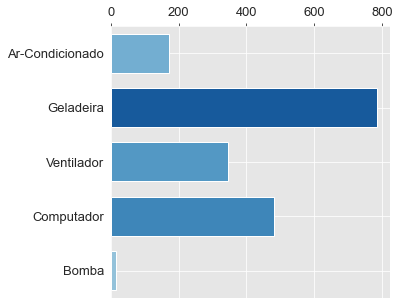

In [11]:
plot_horizontal_bars(usetime, 5, 5,'Horas de uso', bar_size=0.72)
path = IMG_PATH+"/usetime.svg"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
path = IMG_PATH+"/usetime.png"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')

In [12]:
print(energy_d['air'], usetime_d['air'])

91449.39693 170.53333333333333


In [13]:
KW_COST = 0.7321
ch_air = (energy_d['air']/usetime_d['air'])*KW_COST/1000
ch_fg = (energy_d['fridge']/usetime_d['fridge'])*KW_COST/1000
ch_pc = (energy_d['computer']/usetime_d['computer'])*KW_COST/1000
ch_pump = (energy_d['pump']/usetime_d['pump'])*KW_COST/1000
ch_fan = (energy_d['fan']/usetime_d['fan'])*KW_COST/1000

In [14]:
load_costtime = [ch_air, ch_fg, ch_pc, ch_pump, ch_fan]

In [15]:
load_names = ['Ar-Condicionado','Geladeira','Computador', 'Bomba','Ventilador']

In [16]:
cost_p_hour = lists_to_dict(load_names,load_costtime, False)

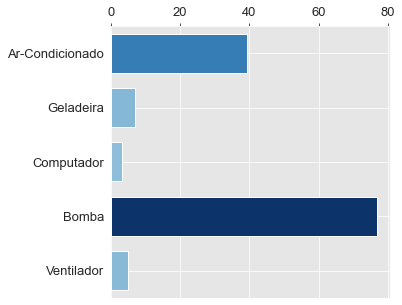

In [17]:
plot_horizontal_bars(cost_p_hour, 5, 5,'Custo por hora (Centavos de R$)', 100, bar_size=0.72)
path = IMG_PATH+"/costhour.svg"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')
path = IMG_PATH+"/costhour.png"
plt.savefig(path, dpi=300, pad_inches=0.05, bbox_inches='tight')